In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
df = pd.read_csv('dao_maker_launches_cleaned.csv', sep='\t').drop(['Unnamed: 0', 'total_supply'], axis=1)

df.head()

,name,money_raised,ATH_ROI,catg,VC,MM,cap_controlled,dao_approved,cg_id,launch_date,chain,btc_f&g_index,launch_month,desc,desc_len,token_count,marketing_count,user_count
0,gamium,200000,43,Metaverse,DAO Maker,DAO Maker,0.0,0.0,gamium,30/03/22,binance-smart-chain,55,3,WHAT IS GAMIUM? Gamium is a web3 and metaverse...,4569,2,1,4
1,adaswap,195000,12,DeFi,Shima Capital,MarketMaker.io,0.0,0.0,adaswap,05/04/22,ethereum,53,4,WHAT IS ADASWAP (ASW)? AdaSwap strives to be t...,4740,8,1,7
2,step-app,2750000,149,Move To Earn,0,Kairon Labs,1.0,1.0,step-app-fitfi,26/04/22,avalanche,27,4,WHAT IS STEP APP (FITFI)? Step App is the next...,3030,5,1,3
3,dragon-sb,195000,9,Gaming,DnR Labs,0,0.0,1.0,dragonsb,15/03/22,binance-smart-chain,21,3,WHAT IS DRAGONSB? DragonSB - a product of DRAG...,4718,3,6,6
4,defiato,600000,2,DeFi,CRC,MarketMaker.io,0.0,1.0,defiato,16/12/20,ethereum,92,12,WHAT IS DEFIATO? DeFiato is the next-generatio...,5236,2,3,16


In [105]:
# As there's so many companies that appeared only once, let's call them other
df['VC'].value_counts().index

Index([' DAO Maker ', '0', ' Binance ', ' LD Capital ', ' AU21 ',
       ' Lucid Blue ', ' Cinchblock ', ' Magnus Capital ', ' NGC ',
       ' Defiance ', ' SMC Capital ', ' Icetea Labs ', ' Dominance Ventures ',
       ' Genblock ', ' Existential ', ' Three Commas ', ' SL2 ',
       ' Ex Network ', ' Megala ', ' Moonwhale ', ' DcentraLab ',
       ' Blocktower ', ' Rarestone ', ' Hacken ', ' DEXT Ventures ',
       ' Delphi ', ' Future Perfect ', ' M6 ', ' Three Arrows Capital ',
       ' DnR Labs ', ' CRC ', ' Delphi Digital ', ' Halvings ', ' Jump ',
       ' Raptor ', ' SparkPoint ', ' Blockchain.com ', ' Solidity Ventures ',
       ' Rikkei ', ' Faraland ', ' IDO Research Ventures ', ' Solana ',
       ' Fenbushi Capital ', ' Shima Capital ', ' Sequoia ', ' Chromnia '],
      dtype='object')

In [109]:
common_vcs = [' DAO Maker ', '0', ' Binance ', ' LD Capital ', ' AU21 ',
       ' Lucid Blue ', ' Cinchblock ', ' Magnus Capital ', ' NGC ',
       ' Defiance ']
df['VC'] = df['VC'].apply(lambda x: x if x in common_vcs else 'other')
df['VC'].value_counts()

other               36
 DAO Maker          22
0                   14
 Binance             4
 LD Capital          4
 AU21                3
 Cinchblock          2
 NGC                 2
 Lucid Blue          2
 Defiance            2
 Magnus Capital      2
Name: VC, dtype: int64

In [143]:
# Let's do the same thing with 'chain', 'catg' and 'MM' columns
common_chains = ['ethereum', 'binance-smart-chain', 'solana', 'polygon-pos', 'avalanche', 'own']
df['chain'] = df['chain'].apply(lambda x: x if x in common_chains else 'other')
df['chain'].value_counts()

common_mms =['0', ' MarketMaker.io ', ' DAO Maker ', ' Skynet Trading ',
       ' Kairon Labs ', ' Jump ', ' Dark Pool ', ' Acheron ']
df['MM'] = df['MM'].apply(lambda x: x if x in common_mms else 'other')
df['MM'].value_counts()

common_ctgs =['Gaming', 'DeFi', 'Blockchain Service', 'Metaverse', 'NFT', 'Launchpad',
       'Trading and Investment', 'Infastructure', 'Protocol',
       'Financial Services']
df['catg'] = df['catg'].apply(lambda x: x if x in common_ctgs else 'other')
df['catg'].value_counts()


Gaming                    25
DeFi                      24
other                     14
Blockchain Service         6
Metaverse                  5
NFT                        5
Launchpad                  4
Trading and Investment     4
Protocol                   2
Financial Services         2
Infastructure              2
Name: catg, dtype: int64

In [119]:
df.columns

df['token_count']= df.apply(lambda x: x.token_count / x.desc_len, axis=1)
df['marketing_count'] = df.apply(lambda x: x.marketing_count / x.desc_len, axis=1)
df['user_count'] = df.apply(lambda x: x.user_count / x.desc_len, axis=1)

In [231]:
df.columns =['name', 'money_raised', 'ATH_ROI', 'catg', 'VC', 'MM', 'cap_controlled',
       'dao_approved', 'cg_id', 'launch_date', 'chain',
       'btc_fg_index', 'launch_month', 'desc', 'desc_len', 'token_ratio',
       'marketing_ratio', 'user_ratio']

In [121]:
df.describe()

,money_raised,ATH_ROI,cap_controlled,dao_approved,btc_fg_index,launch_month,desc_len,token_count,marketing_count,user_count
count,9.300000e+01,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.616882e+05,41.946237,0.150538,0.645161,49.483871,7.129032,6256.494624,0.001416,0.000324,0.001148
std,6.377638e+05,63.454086,0.359536,0.481058,22.083642,3.563785,3264.314881,0.000972,0.000305,0.000950
min,6.000000e+04,1.000000,0.000000,0.000000,18.000000,1.000000,1995.000000,0.000108,0.000000,0.000000
25%,1.000000e+05,9.000000,0.000000,0.000000,28.000000,4.000000,4410.000000,0.000636,0.000144,0.000344
50%,1.650000e+05,21.000000,0.000000,1.000000,50.000000,8.000000,5455.000000,0.001265,0.000231,0.000905
75%,2.750000e+05,43.000000,0.000000,1.000000,71.000000,10.000000,7703.000000,0.001833,0.000421,0.001666
max,3.900000e+06,352.000000,1.000000,1.000000,95.000000,12.000000,19040.000000,0.005954,0.001581,0.003741


<AxesSubplot:>

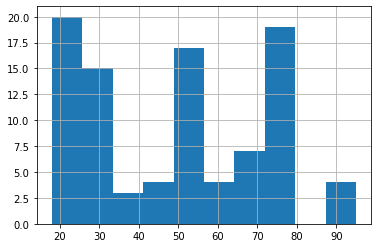

In [122]:
df.btc_fg_index.hist()

<AxesSubplot:>

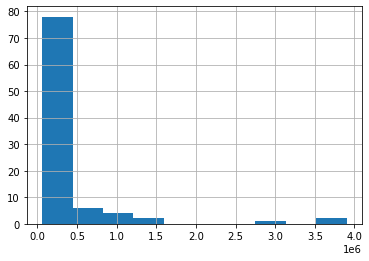

In [123]:
df.money_raised.hist(bins=10)

<AxesSubplot:>

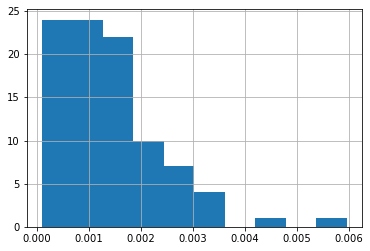

In [124]:
df.token_count.hist()

<AxesSubplot:>

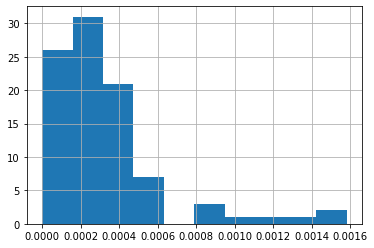

In [125]:
df.marketing_count.hist()

<AxesSubplot:>

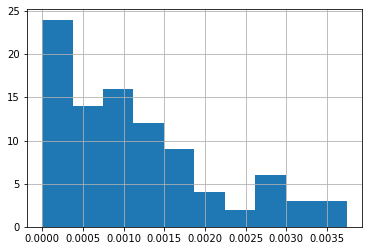

In [126]:
df.user_count.hist()

<AxesSubplot:>

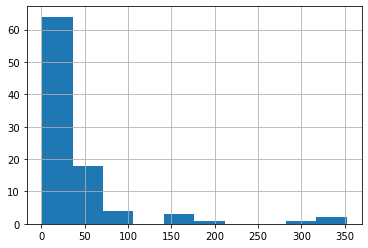

In [127]:
df.ATH_ROI.hist()

<AxesSubplot:>

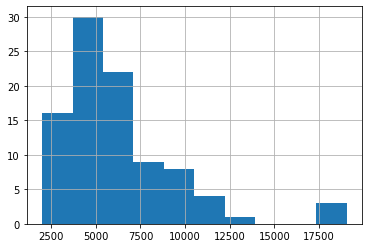

In [128]:
df.desc_len.hist(bins=10)

<AxesSubplot:>

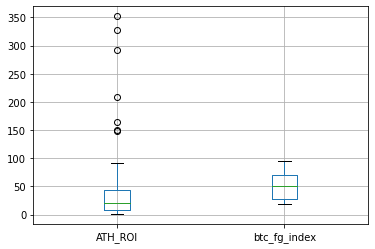

In [129]:
df.boxplot(column=['ATH_ROI', 'btc_fg_index'] )

<AxesSubplot:>

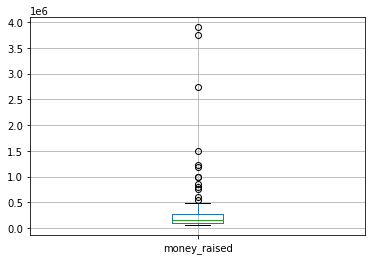

In [130]:
df.boxplot(column=['money_raised'] )

<AxesSubplot:>

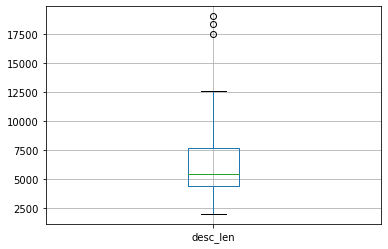

In [131]:
df.boxplot(column=['desc_len'] )

In [132]:
corr = df[['desc_len', 'money_raised', 'ATH_ROI', 'btc_fg_index', 'token_count', 'user_count', 'marketing_count']].corr()

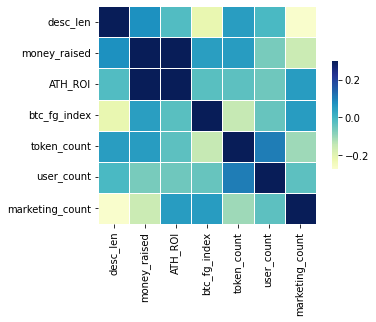

In [249]:
# plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap="YlGnBu", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('corr_heatmap.png', bbox_inches = "tight")

In [134]:
df.columns

Index(['name', 'money_raised', 'ATH_ROI', 'catg', 'VC', 'MM', 'cap_controlled',
       'dao_approved', 'cg_id', 'launch_date', 'chain', 'btc_fg_index',
       'launch_month', 'desc', 'desc_len', 'token_count', 'marketing_count',
       'user_count'],
      dtype='object')

In [144]:
df_cat = df[['catg', 'VC', 'MM', 'cap_controlled', 'dao_approved', 'chain', 'launch_month', ]]

graph for catg: total = 11


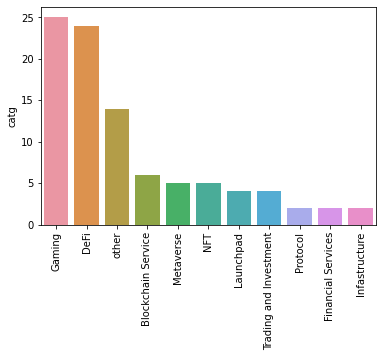

graph for VC: total = 11


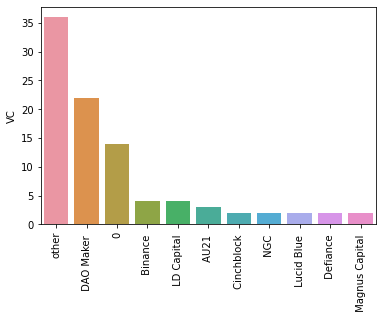

graph for MM: total = 9


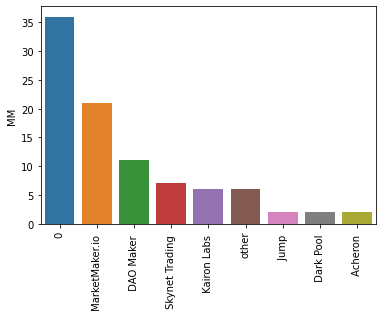

graph for cap_controlled: total = 2


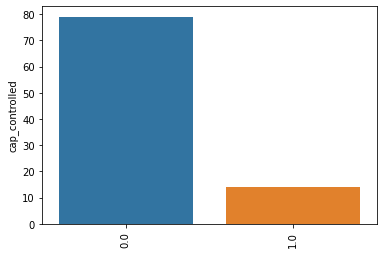

graph for dao_approved: total = 2


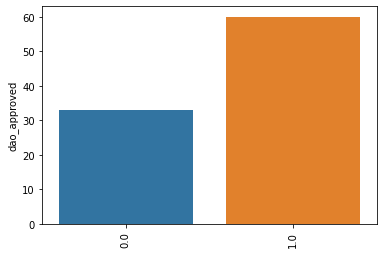

graph for chain: total = 7


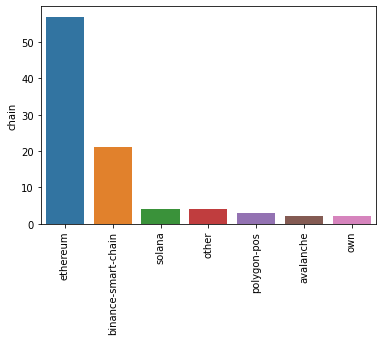

graph for launch_month: total = 12


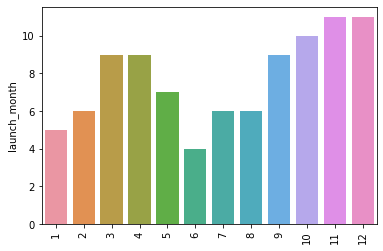

In [145]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [146]:
df.columns

Index(['name', 'money_raised', 'ATH_ROI', 'catg', 'VC', 'MM', 'cap_controlled',
       'dao_approved', 'cg_id', 'launch_date', 'chain', 'btc_fg_index',
       'launch_month', 'desc', 'desc_len', 'token_count', 'marketing_count',
       'user_count'],
      dtype='object')

In [153]:
pd.pivot_table(df, index ='chain', values = 'ATH_ROI')

,ATH_ROI
chain,
avalanche,77.000000
binance-smart-chain,46.095238
ethereum,45.210526
other,13.000000
own,6.000000
polygon-pos,5.333333
solana,30.500000


In [156]:
# Looks like controlled cap generally outperforms uncontrolled one significantly
pd.pivot_table(df, index =['chain','cap_controlled'], values = 'ATH_ROI')

ATH_ROI
chain               cap_controlled            
avalanche           0.0               5.000000
                    1.0             149.000000
binance-smart-chain 0.0              32.105263
                    1.0             179.000000
ethereum            0.0              40.260870
                    1.0              65.909091
other               0.0              13.000000
own                 0.0               6.000000
polygon-pos         0.0               5.333333
solana              0.0              30.500000

In [159]:
pd.pivot_table(df, index =['launch_month'], values = 'ATH_ROI').sort_values('ATH_ROI', ascending=False)

,ATH_ROI
launch_month,
9,76.000000
7,68.166667
3,60.555556
8,51.833333
10,34.900000
4,34.777778
2,33.000000
11,32.909091
12,31.909091


In [160]:
df.columns

Index(['name', 'money_raised', 'ATH_ROI', 'catg', 'VC', 'MM', 'cap_controlled',
       'dao_approved', 'cg_id', 'launch_date', 'chain', 'btc_fg_index',
       'launch_month', 'desc', 'desc_len', 'token_count', 'marketing_count',
       'user_count'],
      dtype='object')

In [177]:
df_pivots = df[['catg', 'VC', 'MM', 'cap_controlled', 'launch_month', 'chain', 'dao_approved']]

In [178]:
for i in df_pivots.columns:
    print(pd.pivot_table(df, index=i, values='ATH_ROI').sort_values('ATH_ROI', ascending=False))

                           ATH_ROI
catg                              
Launchpad               129.750000
Metaverse                67.600000
other                    54.357143
DeFi                     42.333333
Gaming                   35.880000
Protocol                 35.500000
Infastructure            24.000000
NFT                      19.600000
Trading and Investment   14.000000
Blockchain Service       13.833333
Financial Services        7.000000
                    ATH_ROI
VC                         
 DAO Maker        69.454545
0                 50.285714
 Cinchblock       37.000000
other             33.305556
 Binance          28.250000
 LD Capital       26.500000
 NGC              23.500000
 Lucid Blue       21.000000
 AU21             19.000000
 Magnus Capital    9.500000
 Defiance          6.000000
                    ATH_ROI
MM                         
0                 51.027778
 Kairon Labs      50.833333
 Acheron          48.000000
 DAO Maker        40.454545
 MarketMaker.

In [180]:
pd.pivot_table(df, index = 'chain', columns=['dao_approved'], values='ATH_ROI')

dao_approved,0.0,1.0
chain,,
avalanche,NaN,77.000000
binance-smart-chain,29.200000,51.375000
ethereum,36.619048,50.222222
other,15.000000,11.000000
own,3.000000,9.000000
polygon-pos,7.500000,1.000000
solana,38.000000,23.000000


In [183]:
pd.pivot_table(df, index = 'chain', columns=['cap_controlled'], values='ATH_ROI')

cap_controlled,0.0,1.0
chain,,
avalanche,5.000000,149.000000
binance-smart-chain,32.105263,179.000000
ethereum,40.260870,65.909091
other,13.000000,NaN
own,6.000000,NaN
polygon-pos,5.333333,NaN
solana,30.500000,NaN


In [204]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from os import path, getcwd
from PIL import Image

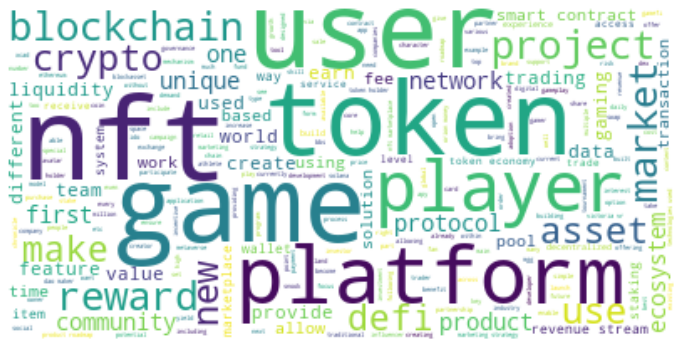

In [224]:
# Code from: https://github.com/PlayingNumbers/Remembering_Kobe
words = " ".join(df['desc'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

#create the word cloud object 
wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000)
wc.generate(text)

plt.figure(figsize=[12,12])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [232]:
df.to_csv('dao_maker_launches_cleaned.csv', sep='\t')

In [244]:
pd.pivot_table(df, index = 'chain', values='ATH_ROI')

,ATH_ROI
chain,
avalanche,77.000000
binance-smart-chain,46.095238
ethereum,45.210526
other,13.000000
own,6.000000
polygon-pos,5.333333
solana,30.500000
